## Import Modules

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Template Matching

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html#template-matching

## Template Matching in OpenCV

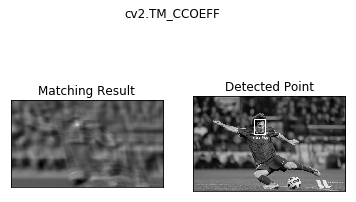

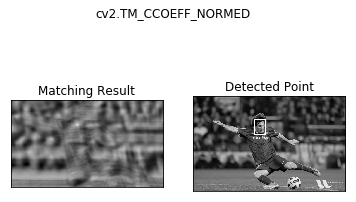

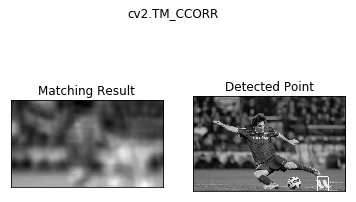

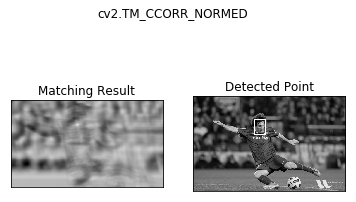

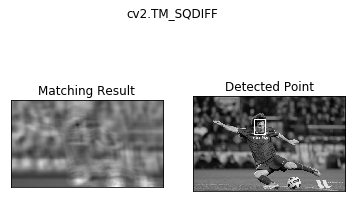

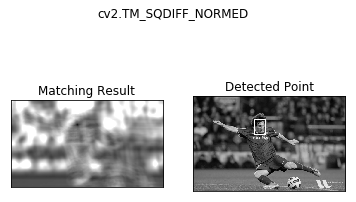

In [8]:
img = cv2.imread('img/messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('img/messi_face.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

## Template Matching with Multiple Objects

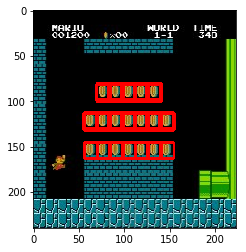

In [12]:
img_bgr = cv2.imread('img/mario.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
template = cv2.imread('img/mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Face Detection using Haar Cascades

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

`haarcascade_eye.xml`, `haarcascade_frontalface_default.xml` are located in `/usr/local/lib/python3.7/site-packages/cv2/data` (Mac OSX)

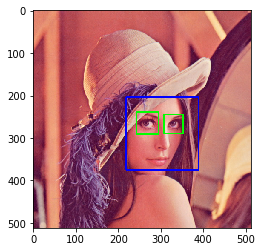

In [16]:
face_cascade = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('xml/haarcascade_eye.xml')

img = cv2.imread('img/lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Optical Flow

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html#lucas-kanade

```
pip3 install opencv-contrib-python
pip3 install opencv-contrib-python-headless
pip3 install opencv-contrib-python-nonfree
pip3 install opencv-contrib-python-nonfree-headless
```

Press 's' to save an image.

In [17]:
!python3 py/optical_flow.py

# Background Subtraction

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html#background-subtraction

In [18]:
!python3 py/background_subtractor.py